In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Minimizer, minimize, Parameters, report_fit, fit_report, printfuncs



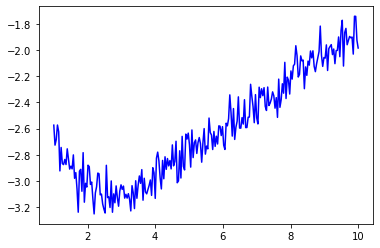

In [3]:
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0 * np.exp(-x / 2) - 5.0 * np.exp(-(x - 0.1) / 10.) + 0.1 * np.random.randn(x.size)
plt.plot(x, y, 'b')
plt.show()

In [4]:
p = Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3., True))

def residual(p):
    v = p.valuesdict()
    return v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y

mi = minimize(residual, p, method='nelder', nan_policy='omit')
printfuncs.report_fit(mi.params, min_correl=0.5)


[[Variables]]
    a1:  2.98623689 (init = 4)
    a2: -4.33525597 (init = 4)
    t1:  1.30993186 (init = 3)
    t2:  11.8240752 (init = 3)


<ipython-input-4-7fb87ee860f8>:6: RuntimeWarning: overflow encountered in exp
  return v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y
<ipython-input-4-7fb87ee860f8>:6: RuntimeWarning: overflow encountered in multiply
  return v['a1'] * np.exp(-x / v['t1']) + v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y
/home/maduar/anaconda3/envs/envpip/lib/python3.8/site-packages/lmfit/minimizer.py:184: RuntimeWarning: overflow encountered in multiply
  return (r*r).sum()


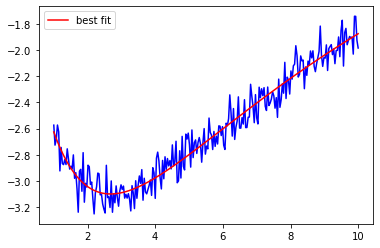

In [5]:
plt.plot(x, y, 'b')
plt.plot(x, residual(mi.params) + y, 'r', label='best fit')
plt.legend(loc='best')
plt.show()

In [15]:
# Para achar onde está o pacote desejado:
# conda activate envpip
# pip list -v
# /home/maduar/anaconda3/envs/envpip/lib/python3.8/site-packages pip

dat = np.loadtxt('NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [12]:
# https://lmfit.github.io/lmfit-py/builtin_models.html?highlight=peaks%20sum#example-3-fitting-multiple-peaks-and-using-prefixes
from lmfit.models import ExponentialModel, GaussianModel

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.52821
    reduced chi-square = 5.15507524
    Akaike info crit   = 417.864631
    Bayesian info crit = 446.036318
[[Variables]]
    exp_amplitude:  99.0183283 +/- 0.53748735 (0.54%) (init = 162.2102)
    exp_decay:      90.9508859 +/- 1.10310509 (1.21%) (init = 93.24905)
    g1_amplitude:   4257.77319 +/- 42.3833643 (1.00%) (init = 2000)
    g1_center:      107.030954 +/- 0.15006786 (0.14%) (init = 105)
    g1_sigma:       16.6725753 +/- 0.16048160 (0.96%) (init = 15)
    g1_fwhm:        39.2609139 +/- 0.37790529 (0.96%) == '2.3548200*g1_sigma'
    g1_height:      101.880231 +/- 0.59217098 (0.58%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:   2493.41771 +/- 36.1694733 (1.45%) (init = 20

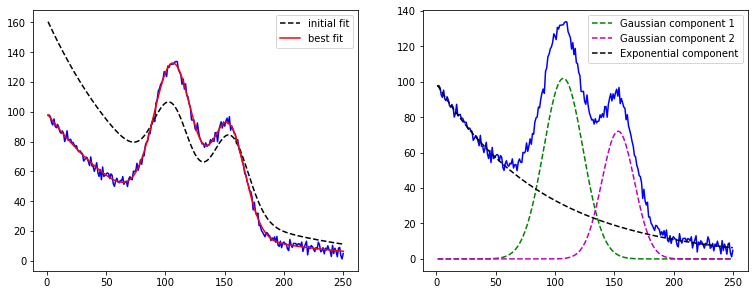

In [14]:
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=105, min=75, max=125)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=2000, min=10)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=155, min=125, max=175)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=2000, min=10)

mod = gauss1 + gauss2 + exp_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.1))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
axes[1].plot(x, comps['exp_'], 'k--', label='Exponential component')
axes[1].legend(loc='best')

plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>